This plot compares the decision surfaces learned by a decision tree classifier (first column), by a random forest classifier (second column), by an extra- trees classifier (third column) and by an AdaBoost classifier (fourth column).
In the first row, the classifiers are built using the sepal width and the sepal length features only, on the second row using the petal length and sepal length only, and on the third row using the petal width and the petal length only.

In [38]:
#import basic utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
#import data and classifiers
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
iris = load_iris() # load data

#Store all classifiers in array to be interable
models = [ DecisionTreeClassifier(max_depth=None),
         RandomForestClassifier(n_estimators=30),
         ExtraTreesClassifier(n_estimators=30),
         AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))]


In [41]:
X = iris.data[:, [0,1]] # pick specific 2 attributes
print X.shape
print X.shape[0]

mean = X.mean(axis=0) # axis =0 implies per column for all rows incase of axis = 1 its per row for all columns
print mean
std =  X.std(axis=0)  #standard deviation
print std
buff = X - mean # will subtrac 2 fields in the column for every row in X
print buff[0]

val = str(type( DecisionTreeClassifier())).split(".")
print val

print val[-1]
print val[-1][-2]
print val[-1][:-2][:-(len("Classifier"))]

(150, 2)
150
[ 5.84333333  3.054     ]
[ 0.82530129  0.43214658]
[-0.74333333  0.446     ]
["<class 'sklearn", 'tree', 'tree', "DecisionTreeClassifier'>"]
DecisionTreeClassifier'>
'
DecisionTree


In [42]:
from sklearn import clone # used in cloning the classifer models used for different attributes of input selected

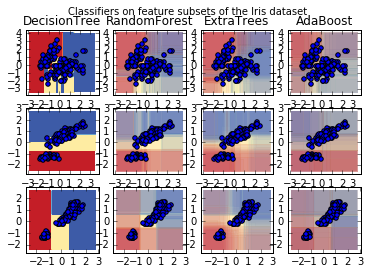

In [44]:
plot_idx = 1 # id per subplots running flat sequence 
for pair in ([0,1],[0,2],[2,3]): # for each combination of 2 attributes in 4 attributes iris data
    for model in models: # each classifier at a time
        X = iris.data[:, pair] # pick selected features
        y = iris.target
        
        #shuffle
        idx = np.arange(X.shape[0]) # create a seq of index from 0 to X rows -1
        np.random.seed(13)
        np.random.shuffle(idx) # shuffles the indexes in the array
        X = X[idx] # refer to variables in this random shuffled order
        y = y[idx] # refer to target indexes in this random shuffled order
        
        #Standardize (Not sure why this is done)
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        #train
        clf = clone(model)
        clf = clf.fit(X,y)
        
        scores = clf.score(X,y)
        
        plt.subplot(3,4,plot_idx) # rows, cols, plot index
        if plot_idx <= len(models): # first row check
            model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
            plt.title(model_title)
            
        #plot decision boundtry
        x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
        y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min, y_max, 0.02))
        
        #Plot contours
        
        if isinstance(model, DecisionTreeClassifier):
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx,yy,Z,cmap=plt.cm.RdYlBu)
        else:
            #build contour with equaly distributed alpha per estimator in the ensemble
            estimator_alpha = 1.0 / len(clf.estimators_)
            for tree in clf.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contourf(xx,yy,Z, alpha = estimator_alpha, cmap = plt.cm.RdYlBu)
        
        plot_idx += 1
        
        plt.scatter(X[:,0],X[:, 1])
        

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()
        